#### Eleonora Bellasio (15650A)
# <span style="color:orangered">Laboratorio di Simulazione Numerica: Esercitazione 8

### <span style="color:royalblue">Esercizio 08.1

Si vuole ottimizzare con un principio variazionale lo stato fondamentale di singola particella quantistica in un dimensione (1D) confinata dal seguente potenziale:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

Questo modello, però, non è risolvbile numericamente e deve essere approcciato con sistemi numerici. Per ottenere una funzione d'onda approssimata per il ground state si applica il metodo Variazionale Monte Carlo che utilizza una funzione d'onda di prova parametrizzata da un set di parametri variazionali. Come modello per la funzione d'onda di ground state si utilizza:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$
che è la sovrapposizione di due gaussiane cantrate in $\pm \mu$, con larghezza $\sigma$.

Si è scritto un codice Monte Carlo Variazionale che sfrutta l'algoritmo di Metropolis per campionare il modulo quadro della funzione d'onda di prova $|\Psi_T^{\sigma,\mu}(x)|^2$, utilizzando una distribuzione di probabilità di transizione uniforme $T(x_{new}|x_{old})$. Con il metodo del data-Blocking, si calcola il valore di aspettazione della hamiltoniana:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

che può essere utilizzato per calcolare i parametri che minimizzano l'energia, e dunque il ground state.
    
$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$

Il passo del Metropols viene aggiustato mediante un'apposita funzione al fine di mantenere un'accettanza sempre vicina al $50%$.

### <span style="color:royalblue">Esercizio 08.2



Per determinare i parametri $\sigma$ and $\mu$ che minimizzano $\langle {\hat H} \rangle_T$, si è esteso il codice Monte Carlo Variazionale per affrontare un problema di ottimizzazione con un algoritmo di Simulated Annealing. Per questo algoritmo si è scelta una temperatura di partenza pari a $T=2.0$ e una legge di aggiornamento che, per ogni passo, diminuisca gradualmente la temperatura di $0.02$ rispetto alla precedente.
All'inizio della simulazione si è scelta una combinazione di parametri $\mu$ e $\sigma$ che poi sono stati aggiornati ad ogni passo, rispettando i vincoli $\mu>0$ e $\sigma>0.15$ (altrimenti darebbero un campionamento inefficiente).
Inoltre, la regola di accettazione per l'energia proposta, che viene seguita dall'algoritmo del Simulated Annealing, è la seguente
$$A_{acc}=min \left( 1, e^{-\frac{\Delta E}{T}}\right)$$
e permette di evitare i minimi locali e arrivare al minimo globale.

Nel grafico viene mostrato l'andamento di ${\langle H_{hat} \rangle}_T$ in funzione degli step dell'algoritmo di SA.

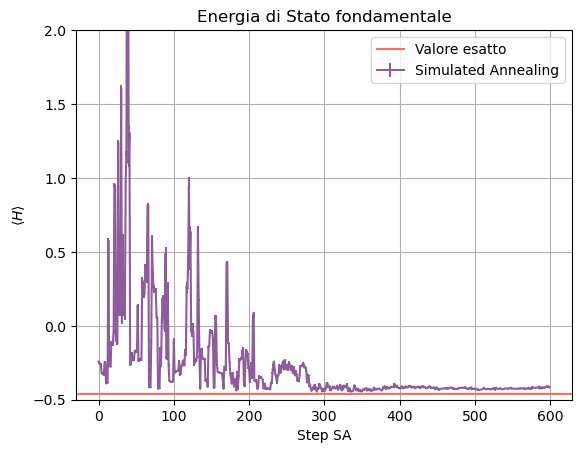

In [52]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import os,sys
import pandas as pd
from scipy.optimize import curve_fit

dinp = "08.2/"
finp = dinp + "output.dat"

if not os.path.isfile(finp):
    sys.exit( "file does not exist: " + finp )

df_H = pd.read_csv(finp, sep='\\s+', comment='#', names=['STEP:','TEMP:','MU:','SIGMA:','ENERGY:', 'ERROR:'])

plt.errorbar(df_H['STEP:'], df_H['ENERGY:'], yerr = df_H['ERROR:'], color = '#8E5B9B', label = 'Simulated Annealing')
plt.axhline(y = -0.46046587969271513, color = '#FF6F61', label = 'Valore esatto')
plt.xlabel('Step SA')
plt.ylabel(r'$\langle H \rangle$')
plt. ylim(-0.5, 2.0)
plt.title('Energia di Stato fondamentale')

plt.grid(True)
plt.legend()
plt.show()



Si mostra l'andamento dei parametri in funzione del numero di step dell'algoritmo di SA

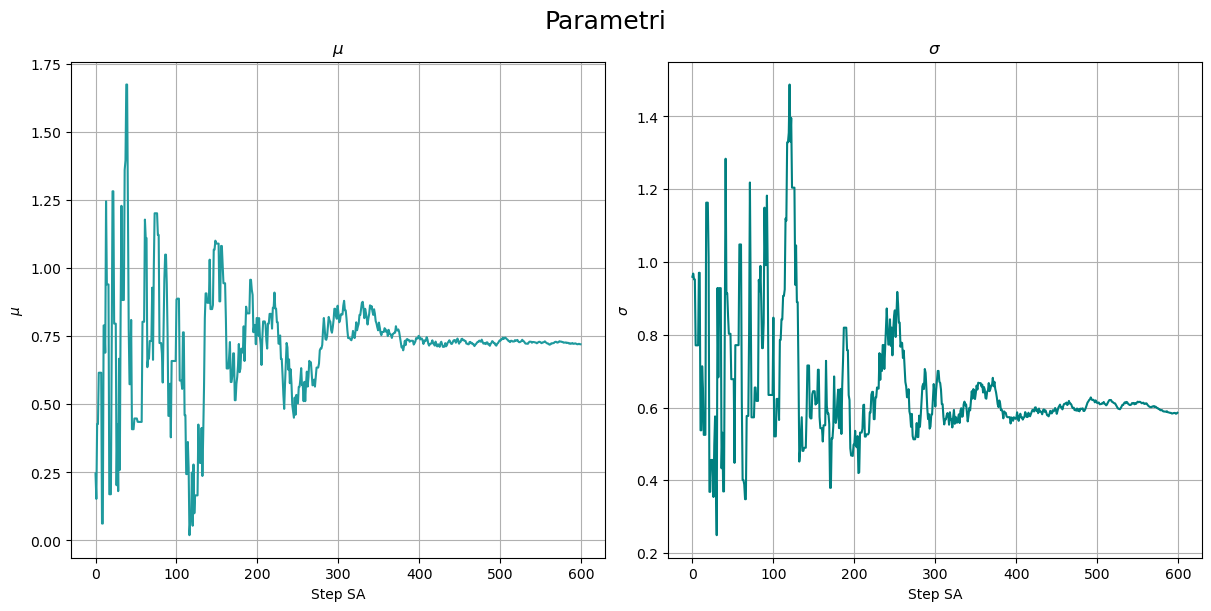

In [53]:
fig, spl = plt.subplots(1, 2, figsize=(12,6), layout = 'constrained') #due grafici affiancati per i parametri
spl[0].plot(df_H['STEP:'], df_H['MU:'], color = '#1F9A9E')
spl[0].set_title(r'$\mu$')
spl[0].set_xlabel('Step SA')
spl[0].set_ylabel(r'$\mu$')
spl[0].grid(True)

spl[1].plot(df_H['STEP:'], df_H['SIGMA:'], color = '#008080')
spl[1].set_title(r'$\sigma$')
spl[1].set_xlabel('Step SA')
spl[1].set_ylabel(r'$\sigma$')
spl[1].grid(True)

fig.suptitle('Parametri', fontsize=18)
plt.show()


I parametri che minimizzano il valore di aspettazione dell'hamoltoniana sono $\mu = 0.720587$ e $\sigma = 0.585504$. Con questi parametri si può graficare $ \langle \hat{H} \rangle$ in funzione del numero di blocchi utilizzati nella tecnica del data-blocking.

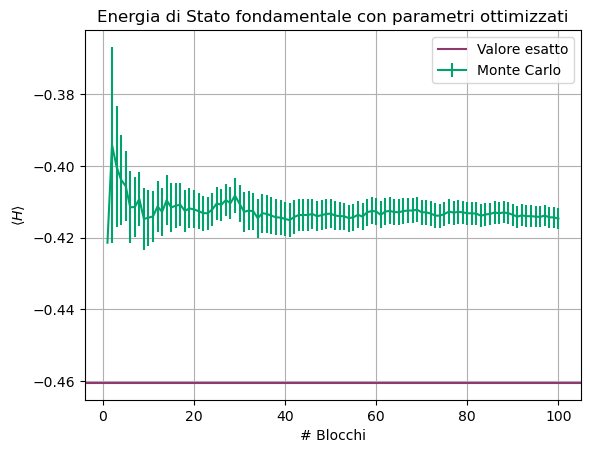

In [54]:
finp1 = dinp + "output_energy_GS.dat"

if not os.path.isfile(finp1):
    sys.exit( "file does not exist: " + finp1 )

df_H_min = pd.read_csv(finp1, sep='\\s+', comment='#', names=['BLOCK:','ENERGY:','ERROR:'])

plt.errorbar(df_H_min['BLOCK:'], df_H_min['ENERGY:'], yerr=df_H_min['ERROR:'], color = '#00A36C', label = 'Monte Carlo')
plt.axhline(y = -0.46046587969271513, color = '#8E3A6E', label = 'Valore esatto')
plt.xlabel('# Blocchi')
plt.ylabel(r'$\langle H \rangle$')
plt.title('Energia di Stato fondamentale con parametri ottimizzati')

plt.grid(True)
plt.legend()
plt.show()

Si costruise anche un istocgramma che campiona $ {\lvert \psi_{T}(x) \rvert}^2$ e che lo confronta con l'andamento analitico della funzione d'onda e con la soluzione numerica che si ottiene trasformando l'equazione di Shroedinger in una matrice e risolvendola.

Ground state energy:  -0.460465879692715


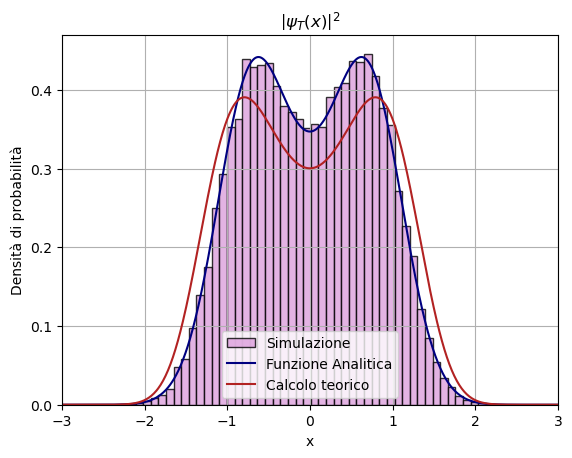

In [55]:
finp2 = dinp + "sampled_x.dat"

if not os.path.isfile(finp2):
    sys.exit( "file does not exist: " + finp2 )

#Defnisco la funzione d'onda psi
def psi (x, mu, sigma):
    return np.exp( -(x-mu)**2 / (2*sigma**2)) + np.exp( -(x+mu)**2 / (2*sigma**2))

mu = 0.720587
sigma = 0.585504

x = np.linspace (-3, 3, 1000)
dx = x[1] - x[0] #dimensione dello step
data = np.loadtxt(finp2)

N = np.sqrt(np.sum(psi(x, mu, sigma)**2)*dx) #normalizzazione
plt.hist(data, bins=50, density=True, alpha=0.8, label='Simulazione', color='plum', edgecolor='black')
plt.plot(x,(psi(x, mu, sigma)/N)**2, color='navy', label='Funzione Analitica')
plt.xlabel('x')
plt.ylabel('Densità di probabilità')
plt.title(r'${\left| \psi_{T}(x) \right|}^2$')

#Calcolo analitico
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
###
plt.plot(x, (psi[0])**2, label='Calcolo teorico', color='firebrick')
plt.ylim(0.0, 0.47)
plt.xlim(-3,3)

plt.legend()
plt.grid(True)
plt.show()
